In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

# Define the data directory
data_dir = 'farm_insects'

# Define the data generator
datagen = ImageDataGenerator(validation_split=0.3, rescale=1./255)

# Load the data from the directory
train_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Specify the target size of the images
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as training data
)

val_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as validation data
)

test_ds = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as test data
)


Found 1076 images belonging to 15 classes.
Found 451 images belonging to 15 classes.
Found 451 images belonging to 15 classes.


### Check tach size 

In [37]:
len_train =  len(train_ds)
len_val =  len(val_ds)
len_test = len(test_ds)

print(f"Number of training samples: {len_train} Number of validation samples: {len_val} Number of test samples: {len_test} ")


Number of training samples: 34 Number of validation samples: 15 Number of test samples: 15 



### Normalization is an important preprocessing step when training CNN models. In the context of image data, normalization refers to scaling the pixel values to a specific range. One common approach is to divide the pixel values by 255.

The reason for this normalization is to ensure that the pixel values are within a consistent range, typically between 0 and 1. By dividing the pixel values by 255, we effectively scale them to the range of [0, 1]. This is important for several reasons:

1. Gradient Stability: During the training process, CNN models use gradient-based optimization algorithms to update the weights. These algorithms are sensitive to the scale of the input data. Normalizing the pixel values helps to stabilize the gradients and improve the convergence of the training process.

2. Model Generalization: Normalization helps the model to generalize well to unseen data. By scaling the pixel values to a consistent range, the model becomes less sensitive to variations in the input data. This can improve the model's ability to classify images that have different lighting conditions, contrast levels, or color distributions.

3. Avoiding Saturation: In image data, pixel values are typically represented as integers ranging from 0 to 255. If these values are directly used as input to the CNN model, they can lead to saturation of the activation functions. Saturation occurs when the input values are too large or too small, causing the activation functions to flatten and lose their discriminative power. Normalizing the pixel values to the range of [0, 1] helps to avoid this issue.

Overall, normalization by dividing the pixel values by 255 is a common practice in training CNN models. It helps to stabilize gradients, improve model generalization, and avoid saturation issues. By ensuring that the input data is within a consistent range, normalization contributes to the overall performance and effectiveness of the CNN model.


In [50]:
import numpy as np



# Convert the TensorFlow result from datagen into a NumPy array
train_data = next(train_ds)
val_data = next(val_ds)
test_data = next(test_ds)

# Access the images and labels from the NumPy arrays
train_images, train_labels = train_data
val_images, val_labels = val_data
test_images, test_labels = test_data

np.max(train_images), np.min(train_images), np.max(train_images)


(1.0, 0.0, 1.0)

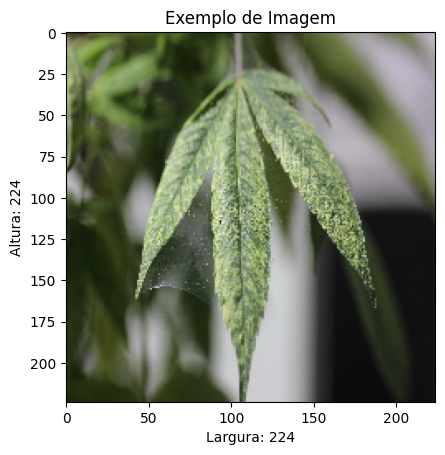

/home/gava/.local/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


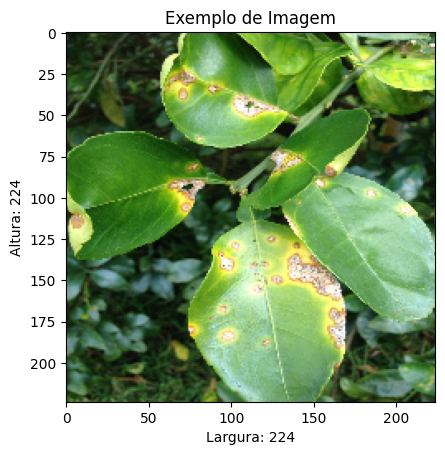

In [51]:
import matplotlib.pyplot as plt

count_plot_image = 0

# Supondo que train_ds é o seu ImageDataGenerator
for x_batch, _ in train_ds:
    # Pegue a primeira imagem do lote
    image = x_batch[0]
    count_plot_image += 1
    
    height, width, _ = image.shape    
        
    plt.imshow(image)
    plt.title("Exemplo de Imagem")
    plt.xlabel(f'Largura: {width}')
    plt.ylabel(f'Altura: {height}')
    plt.show()
    
    if count_plot_image == 2:
        break
